In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import StepLR

In [2]:
train_file_list = os.listdir('C:\\Users\\21945\\Desktop\\毅杨\\EEG\\EEG\\eegdata_3000\\train')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\\Users\\21945\\Desktop\\毅杨\\EEG\\EEG\\eegdata_3000\\train")
for train_file_name in train_file_list:
    print(train_file_name)
os.chdir(saved_path)

Current Working Directory is C:\Users\21945\PycharmProjects\Hands-on-EEG
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_0.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_1.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_3.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_4.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_0.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_1.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_2.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_3.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_4.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_0.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_1.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_2.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_0.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_10.csv
read_bke

In [3]:
train_labels = []
for train_file_name in train_file_list:
    train_labels.append(train_file_name.split('_')[0])

print(train_labels)
print(train_labels[3])

label_map = {'lefthand': 0, 'read': 1, 'rest': 2, 'walkbase': 3, 'walkl': 4 ,'walkfocus': 5}

encode_labels  = [label_map[train_label] for train_label in train_labels]

train_label = torch.tensor(encode_labels, dtype=torch.int64)

['lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkfo

In [4]:
valid_file_list = os.listdir('C:\\Users\\21945\\Desktop\\毅杨\\EEG\\EEG\\eegdata_3000\\validation')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\\Users\\21945\\Desktop\\毅杨\\EEG\\EEG\\eegdata_3000\\validation")
for valid_file_name in valid_file_list:
    print(valid_file_name)
os.chdir(saved_path)

Current Working Directory is C:\Users\21945\PycharmProjects\Hands-on-EEG
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_2.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_3.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_4.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_1.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_5.csv
read_bke_03_epocflex_2023.03.22t16.04.38+08.00.md.bp.csv_2.csv
read_bke_04_epocflex_2023.03.22t16.07.02+08.00.md.bp.csv_0.csv
read_bke_04_epocflex_2023.03.22t16.07.02+08.00.md.bp.csv_3.csv
read_bke_05_epocflex_2023.03.22t16.09.28+08.00.md.bp.csv_3.csv
rest_cp_epocflex_2023.03.26t14.28.21+08.00.md.bp.csv_0.csv
rest_cp_epocflex_2023.03.26t14.28.21+08.00.md.bp.csv_1.csv
rest_cp_epocflex_2023.03.26t14.28.21+08.00.md.bp.csv_2.csv
rest_cp_epocflex_2023.03.26t14.28.21+08.00.md.bp.csv_4.csv
rest_cp_epocflex_2023.03.26t14.30.40+08.00.md.bp.csv_1.csv
rest_cp_epocflex_2023.03.26t14.32.55+08.00.md.bp.csv_1.csv
re

In [5]:
valid_labels = []
for valid_file_name in valid_file_list:
    valid_labels.append(valid_file_name.split('_')[0])

print(valid_labels)
print(valid_labels[3])

label_map = {'lefthand': 0, 'read': 1, 'rest': 2, 'walkbase': 3, 'walkl': 4 ,'walkfocus': 5}

encode_labels  = [label_map[valid_label] for valid_label in valid_labels]

valid_label = torch.tensor(encode_labels, dtype=torch.int64)
print(valid_label)

['lefthand', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl', 'walkl']
read
tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])


In [6]:
train_unique_objects = set(train_labels)
train_class_number = len(train_unique_objects)
print(train_class_number)

valid_unique_objects = set(valid_labels)
valid_class_number = len(valid_unique_objects)
print(valid_class_number)

6
6


In [7]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class EEGDataset(Dataset):
    def __init__(self, filelist, root_dir,data_label,transform=None):
        self.filelist = filelist
        self.root_dir = root_dir
        self.data_label = data_label
        self.transform = transform


    def __len__(self):
        return len(self.filelist)

    def __getitem__(self, index):
        #print('index:', index, 'len(self.filelist):', len(self.filelist), 'len(self.data_label):', len(self.data_label))
        data_label = self.data_label[index]
        file_path = os.path.join(self.root_dir, self.filelist[index])
        eeg_data = np.array(pd.read_csv(file_path))
        return eeg_data, data_label

In [8]:
class EEGNet(nn.Module):
    def __init__(self, num_classes=6):
        super(EEGNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(1, 4), stride=(1, 2))
        self.bn1 = nn.BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.pool1 = nn.MaxPool2d(kernel_size=(1, 4), stride=(1, 4))
        self.dropout1 = nn.Dropout(p=0.25)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(1, 2), stride=(1, 2))
        self.bn2 = nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.pool2 = nn.MaxPool2d(kernel_size=(1, 4), stride=(1, 4))
        self.dropout2 = nn.Dropout(p=0.25)
        self.fc1 = nn.Linear(47104, 128)
        self.dropout3 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, 6)


    def forward(self, x):
        x = torch.unsqueeze(x, 1)
        #print('x:', x.shape)
        x = self.conv1(x)
        #print('conv1:', x.shape)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        #print('conv2:', x.shape)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.pool2(x)
        x = self.dropout2(x)
        x = x.view(x.size(0), -1)
        #print('flatten:', x.shape)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout3(x)
        x = self.fc2(x)
        return x

# model = EEGNet()

In [9]:
X = torch.randn(size=( 1, 32, 3000), dtype=torch.float32)
model = EEGNet()
output = model(X)
print(output.shape)

torch.Size([1, 6])


In [10]:
train_dataset = EEGDataset(train_file_list, 'C:\\Users\\21945\\Desktop\\毅杨\\EEG\\EEG\\eegdata_3000\\train', train_label)
valid_dataset = EEGDataset(valid_file_list, 'C:\\Users\\21945\\Desktop\\毅杨\\EEG\\EEG\\eegdata_3000\\validation', valid_label)

In [11]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)

In [12]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [13]:
learning_rate = 0.0001
batch_size = 64
num_epochs = 100
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [14]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X.float())
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            global train_loss
            train_loss.append(loss)



def test(dataloader, model,loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error:\n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    global valid_loss
    valid_loss.append(test_loss)
    global accuracy
    accuracy.append(correct)

In [16]:
#torch.cuda.empty_cache()
# model = model = EEG_LSTM(input_size=31000, hidden_size=128, num_layers=2,num_classes=train_class_number).to(device)
model = model.cuda()
train_loss = []
valid_loss = []
accuracy = []
for t in range(num_epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    model.train(True)
    train(train_loader, model, loss_fn, optimizer)

    model.train(False)
    test(valid_loader, model, loss_fn)

print("Done!")

Epoch 1
-------------------------------
loss: 1.901548  [    0/  161]
Test Error:
 Accuracy: 26.1%, Avg loss: 1.200320 

Epoch 2
-------------------------------
loss: 1.776071  [    0/  161]
Test Error:
 Accuracy: 47.8%, Avg loss: 0.943884 

Epoch 3
-------------------------------
loss: 1.311726  [    0/  161]
Test Error:
 Accuracy: 50.7%, Avg loss: 1.193842 

Epoch 4
-------------------------------
loss: 1.035802  [    0/  161]
Test Error:
 Accuracy: 53.6%, Avg loss: 1.044674 

Epoch 5
-------------------------------
loss: 1.177753  [    0/  161]
Test Error:
 Accuracy: 55.1%, Avg loss: 1.082363 

Epoch 6
-------------------------------
loss: 0.830889  [    0/  161]
Test Error:
 Accuracy: 60.9%, Avg loss: 1.195333 

Epoch 7
-------------------------------
loss: 0.988464  [    0/  161]
Test Error:
 Accuracy: 71.0%, Avg loss: 1.015409 

Epoch 8
-------------------------------
loss: 0.851873  [    0/  161]
Test Error:
 Accuracy: 76.8%, Avg loss: 0.803626 

Epoch 9
------------------------

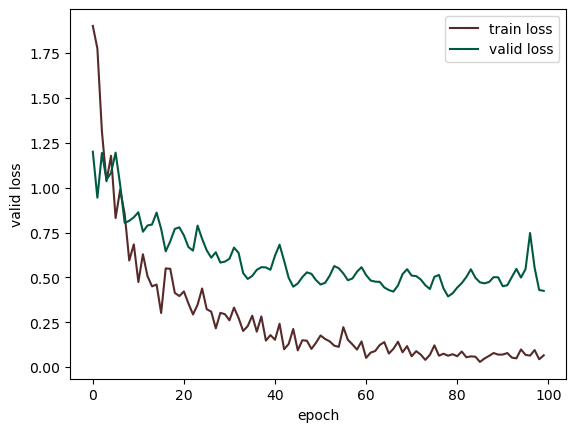

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
hex_d1 = '#552a28'
hex_d2 = '#005943'

plt.figure()
plt.plot(train_loss,hex_d1,label='train loss')
plt.ylabel('train loss')
plt.xlabel('epoch')
plt.plot(valid_loss,hex_d2,label='valid loss')
plt.ylabel('valid loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig('cnn_3000_100e_loss_2.png')
plt.show()

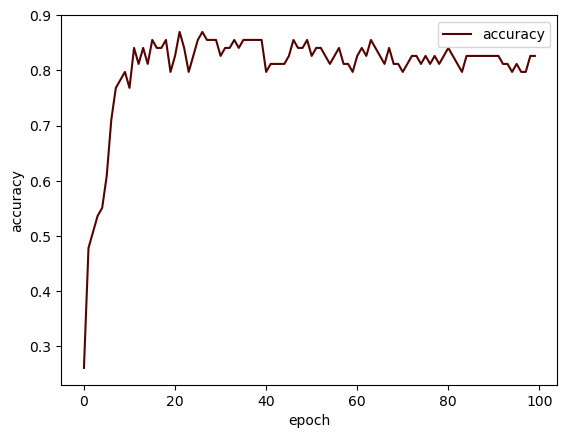

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure()
plt.plot(accuracy, color = '#550300', label='accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.savefig('cnn_3000_100e_accuracy_2.png')
plt.show()

In [20]:
model.eval()
model = EEGNet()
save_path = './model_saved/cnn_3000_100e_3.pt'
# torch.save(model, save_path)
# loaded_model = torch.load(save_path)
torch.save(model.state_dict(), save_path)
loaded_model = EEGNet()
loaded_model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [21]:
import onnx
import onnxruntime
from torch import nn
onnx_file_name = "./cnn_3000_100e_3.onnx"
torch.load(save_path, map_location=torch.device('cpu'))

OrderedDict([('conv1.weight',
              tensor([[[[-0.1589,  0.1486,  0.2203, -0.1499]]],
              
              
                      [[[ 0.3101,  0.4020,  0.2300,  0.3976]]],
              
              
                      [[[ 0.3011, -0.3631, -0.3115,  0.1161]]],
              
              
                      [[[-0.0137,  0.2206,  0.1853, -0.3547]]],
              
              
                      [[[ 0.4965, -0.3009, -0.2203,  0.2496]]],
              
              
                      [[[ 0.2626, -0.1776, -0.1446,  0.3192]]],
              
              
                      [[[ 0.4805,  0.0210, -0.0289,  0.2290]]],
              
              
                      [[[-0.1260,  0.0543,  0.3100, -0.2174]]],
              
              
                      [[[ 0.2994,  0.0453, -0.1836, -0.1164]]],
              
              
                      [[[ 0.4940,  0.3506,  0.0282,  0.0926]]],
              
              
                      [[[-0.42

In [22]:
model.eval()
batch_size = 1
dummy_input = torch.randn(batch_size, 32, 3000,requires_grad=True ,dtype=torch.float32)
output = model(dummy_input)
torch.onnx.export(model, dummy_input, onnx_file_name, verbose=True, input_names=['input'], output_names=['output'],
 dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}})


================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [23]:
import onnx
# 我们可以使用异常处理的方法进行检验
try:
    # 当我们的模型不可用时，将会报出异常
    onnx.checker.check_model(onnx_file_name)
except onnx.checker.ValidationError as e:
    print("The model is invalid: %s"%e)
else:
    # 模型可用时，将不会报出异常，并会输出“The model is valid!”
    print("The model is valid!")

The model is valid!


In [24]:
# import onnxruntime
# import numpy as np
# sess = onnxruntime.InferenceSession(onnx_file_name)
#
# def to_numpy(tensor):
#     return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()
#
# input_name = sess.get_inputs()[0].name
# label_name = sess.get_outputs()[0].name
#
# np.testing.assert_almost_equal(
#     to_numpy(output),
#     sess.run([label_name], {input_name: to_numpy(dummy_input)})[0]
# )


In [38]:
signal = pd.read_csv("C:\\Users\\21945\\Desktop\\毅杨\\EEG\\EEG\\eegdata_3000\\validation\\walkl_cp_epocflex_2023.03.26t14.13.37+08.00.md.bp.csv_3.csv")
model = EEGNet()
model.load_state_dict(torch.load(save_path))
model.eval()
input = torch.from_numpy(signal.values)
input = input.unsqueeze(0)
with torch.no_grad():
    output = model(input.float())
    print(output)
# probabilities = torch.nn.functional.softmax(output, dim=1)
# print(probabilities)

_, pred = torch.max(output, dim=1)  # 找到预测分数最大的类别，得到预测类别
label_map = {0: 'lefthand', 1:'read' ,  2:'rest', 3: 'walkbase', 4: 'walkl' ,5: 'walkfocus'}
print(label_map[pred.item()])

tensor([[ 2.8488,  8.1897, 16.3652, -2.1248, 12.1701,  0.2475]])
rest


In [39]:
# pro = probabilities*100
# print(pro)